In [1]:
# Dataset : IPL 2022
# Criteria : Runs, SR, min balls faced
# Comparison : Other wk middle order batsmen

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)

In [8]:
df = pd.read_csv('C:\IPL_all_matches.csv')

In [9]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.season. unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022], dtype=int64)

In [12]:
df= df[(df.season==2022)]

In [13]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208041,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.1,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208042,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.2,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208043,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.3,Kolkata Knight Riders,Chennai Super Kings,VR Iyer,AM Rahane,TU Deshpande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208044,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.4,Kolkata Knight Riders,Chennai Super Kings,AM Rahane,VR Iyer,TU Deshpande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208045,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",2,4.5,Kolkata Knight Riders,Chennai Super Kings,AM Rahane,VR Iyer,TU Deshpande,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
225948,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,13.6,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,Rashid Khan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.1,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,12.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Gujarat Titans', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Rajasthan Royals'], dtype=object)

In [18]:
df[df.batting_team== 'Chennai Super Kings']['striker'].unique()

array(['MS Dhoni', 'RA Jadeja', 'AT Rayudu', 'RV Uthappa', 'S Dube',
       'DP Conway', 'RD Gaikwad', 'D Pretorius', 'MM Ali', 'DJ Bravo',
       'CJ Jordan', 'Mukesh Choudhary', 'MJ Santner', 'Simarjeet Singh',
       'M Theekshana', 'N Jagadeesan'], dtype=object)

In [19]:
msdf = df[df.striker == 'MS Dhoni']

In [20]:
msdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208072,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,19.2,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,AD Russell,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208073,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,19.3,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,AD Russell,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208074,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,19.4,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,AD Russell,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208075,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,19.5,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,AD Russell,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208158,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,18.8,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,Shivam Mavi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
msdf['ball'].count()

198

In [25]:
df1 = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [26]:
df1.head()

,striker,runs_off_bat
0,A Badoni,161
1,A Manohar,108
2,A Nortje,1
3,A Tomar,4
4,AD Russell,335


In [27]:
df2 =pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()

In [28]:
df2.head()

,striker,ball
0,A Badoni,139
1,A Manohar,79
2,A Nortje,7
3,A Tomar,8
4,AD Russell,200


In [29]:
df3 = df1.merge(df2, on = 'striker', how= 'left')

In [30]:
df3.head()

,striker,runs_off_bat,ball
0,A Badoni,161,139
1,A Manohar,108,79
2,A Nortje,1,7
3,A Tomar,4,8
4,AD Russell,335,200


In [31]:
df3['strike_rate'] = 100*df3['runs_off_bat']/df3['ball']

In [32]:
df3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,161,139,115.827338
1,A Manohar,108,79,136.708861
2,A Nortje,1,7,14.285714
3,A Tomar,4,8,50.000000
4,AD Russell,335,200,167.500000


In [34]:
#criteria: min 180 balls since Dhoni has played 198

In [35]:
df3= df3[df3.ball >= 180]

In [36]:
df3.head()

,striker,runs_off_bat,ball,strike_rate
4,AD Russell,335,200,167.500000
6,AK Markram,381,277,137.545126
11,AT Rayudu,274,230,119.130435
13,Abhishek Sharma,426,329,129.483283
26,D Padikkal,376,317,118.611987


In [37]:
df3.striker.unique()

array(['AD Russell', 'AK Markram', 'AT Rayudu', 'Abhishek Sharma',
       'D Padikkal', 'DA Miller', 'DA Warner', 'DJ Hooda', 'F du Plessis',
       'GJ Maxwell', 'HH Pandya', 'Ishan Kishan', 'JC Buttler',
       'JM Bairstow', 'KD Karthik', 'KL Rahul', 'KS Williamson',
       'LS Livingstone', 'MM Ali', 'MR Marsh', 'MS Dhoni', 'N Pooran',
       'N Rana', 'PP Shaw', 'Q de Kock', 'RA Tripathi', 'RD Gaikwad',
       'RG Sharma', 'RM Patidar', 'RR Pant', 'RV Uthappa', 'S Dhawan',
       'S Dube', 'SA Yadav', 'SO Hetmyer', 'SS Iyer', 'SV Samson',
       'Shahbaz Ahmed', 'Shubman Gill', 'Tilak Varma', 'V Kohli',
       'WP Saha', 'YBK Jaiswal'], dtype=object)

In [38]:
dfwk= df3[(df3.striker == 'MS Dhoni') |(df3.striker == 'SV Samson')|(df3.striker == 'RR Pant')|(df3.striker == 'N Pooran')|(df3.striker == 'MS Wade')|(df3.striker == 'JM Bairstow')|(df3.striker == 'JM Sharma')|(df3.striker == 'KD Karthik')|(df3.striker == 'SW Billings')]

In [39]:
dfwk.head()

,striker,runs_off_bat,ball,strike_rate
53,JM Bairstow,253,180,140.555556
61,KD Karthik,330,188,175.531915
88,MS Dhoni,232,198,117.171717
96,N Pooran,306,228,134.210526
129,RR Pant,340,234,145.299145


In [40]:
dfwk.reset_index(inplace = True, drop =True)

In [41]:
dfwk.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
1,KD Karthik,330,188,175.531915
4,RR Pant,340,234,145.299145
5,SV Samson,458,321,142.679128
0,JM Bairstow,253,180,140.555556
3,N Pooran,306,228,134.210526
2,MS Dhoni,232,198,117.171717


In [42]:
dfwk.sort_values('runs_off_bat', ascending = False)

,striker,runs_off_bat,ball,strike_rate
5,SV Samson,458,321,142.679128
4,RR Pant,340,234,145.299145
1,KD Karthik,330,188,175.531915
3,N Pooran,306,228,134.210526
0,JM Bairstow,253,180,140.555556
2,MS Dhoni,232,198,117.171717


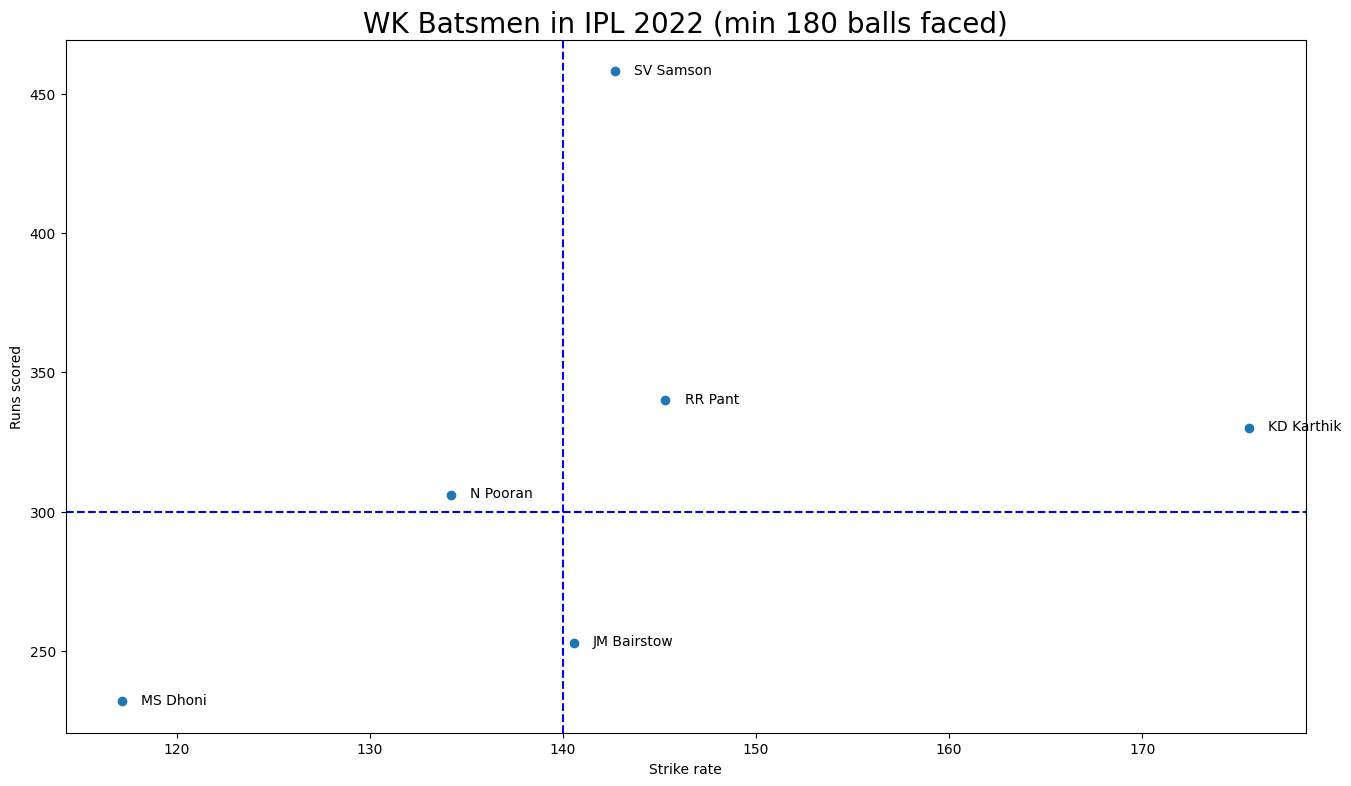

In [43]:
plt.figure(figsize = (16,9))
plt.scatter(dfwk.strike_rate, dfwk.runs_off_bat)
for i in range(len(dfwk)):
    plt.text(dfwk['strike_rate'][i] +1 , dfwk['runs_off_bat'][i] -1 ,dfwk['striker'][i])
plt.axvline(140, ls = '--', color = 'blue')
plt.axhline(300, ls = '--', color = 'blue')
plt.title('WK Batsmen in IPL 2022 (min 180 balls faced)', fontsize =20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

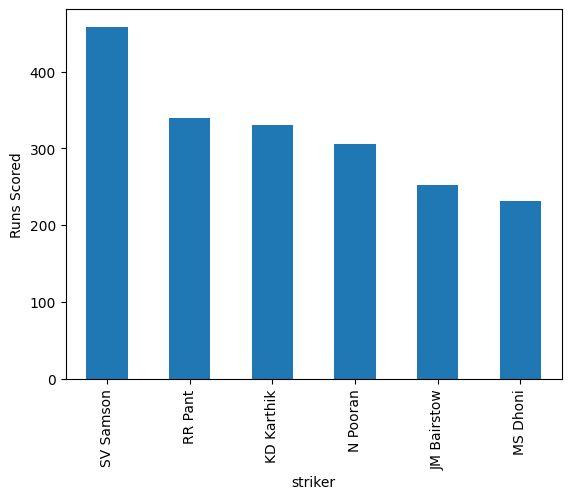

In [44]:
dfwk.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).plot(kind= 'bar')
plt.ylabel('Runs Scored')
plt.show()

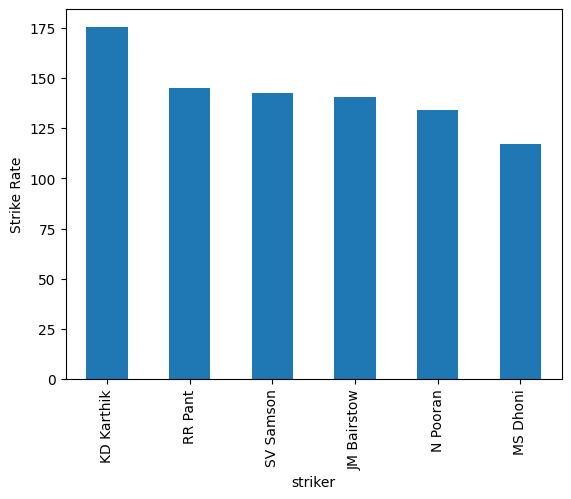

In [45]:
dfwk.groupby(['striker'])['strike_rate'].sum().sort_values(ascending=False).plot(kind= 'bar')
plt.ylabel('Strike Rate')
plt.show()

In [ ]:
Conclusion:
As per the recent IPL 2022 data MS Dhoni has been compared with other Middle Order wicket-keeper batsmen to see where he stands in order to find out if he is good enough to bat.
Runs scored and strike rate is considered with minimum 180 balls faced i.e min 13 balls per match if they play 14 matches.
Now, the comparison is narrrowed to 6 wicket keeper batsmen.
As per the stats we can see that MS Dhoni has faced 198 balls and scored 232 runs at a strike rate of 117.17
Dhoni ranks last in terms of runs scored as well as in terms of strike rate amongst the 6 batsmen which is pretty low.
So it can be concluded that MS Dhoni is not good enough as a batsman anymore.